# Detecting Phishing Websites using Neural Networks

In [1]:
# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

#import Tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
myData = pd.read_csv("C:\\Users\Whoopie\\Desktop\\School\\Spring_2020\\Knowledge_Based_Systems_APT_3020\\Manning-Phishing-Websites-Detection-master\\Phishing.csv")

myData.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [3]:
# Data dimension
myData.shape

(11055, 31)

### Finding out the distribution of the class labels and preparing a report

In [4]:
from collections import Counter

classes = Counter(myData['Result'].values)
classes.most_common()

class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


### Plot bar distribution

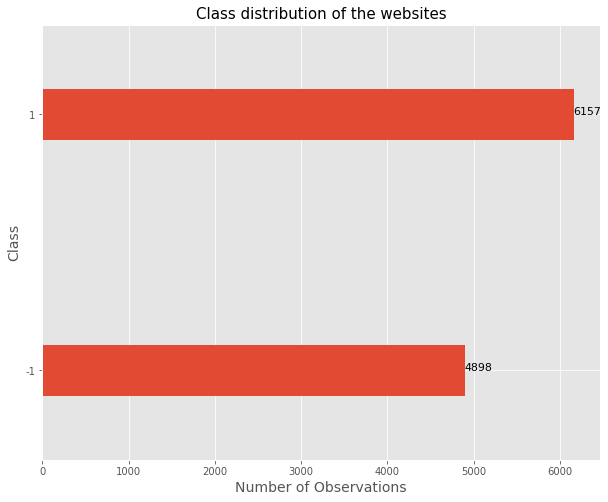

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

In [6]:
#Find null
myData.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Mapping the -1 values to 0 in the class labels

In [7]:
myData.rename(columns={'Result': 'Class'}, inplace=True)
#When inplace = True is used, it performs operation on data and nothing is returned. 
#When inplace=False is used, it performs operation on data and returns a new copy of data

myData['Class'] = myData['Class'].map({-1:0, 1:1})
myData['Class'].unique()

array([0, 1], dtype=int64)

### Split data

In [8]:
from sklearn.model_selection import train_test_split

#iloc is integer index based, so it specifies rows and columns by their integer index
X = myData.iloc[:,0:30].values.astype(int)
y = myData.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

#### Fit training data to the Logistic Regression Classifier; suitable coz data is in -1, 0, 1.

In [11]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Find  Accuracy

In [12]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, logreg.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, logreg.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 93.71%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



### Hyperparameter tuning with random search

In [17]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
#penalty : Used to specify the norm used in the penalization (regularization).
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]

#max_iter : Maximum number of iterations taken to converge.
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))


Best score: 92.41 using {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 250, 'C': 0.9}


### Use Neural networks

In [14]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

Using TensorFlow backend.


In [15]:
# Model building using the Sequential API
#provides linear stack of layers
model = Sequential()

#activation function introduces non-linearity into the output of a neuron
model.add(Dense(40, activation='relu', kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(30, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', kernel_initializer='uniform'))

#loss measures how far from the true value the prediction is.
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras import callbacks
#Callbacks can help get internal states and statistics of the model during training

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)
#min-delta: minimum change in the monitored quantity to modify as an improvement
#patience: number of epochs with no improvement after which training will stop

history = model.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/128
8844/8844 [==============================] - 1s 81us/step - loss: 0.4172 - accuracy: 0.8272
Epoch 2/128
8844/8844 [==============================] - 0s 26us/step - loss: 0.2030 - accuracy: 0.9210
Epoch 3/128
8844/8844 [==============================] - 0s 27us/step - loss: 0.1944 - accuracy: 0.9233
Epoch 4/128
8844/8844 [==============================] - 0s 26us/step - loss: 0.1903 - accuracy: 0.9251
Epoch 5/128
8844/8844 [==============================] - 0s 27us/step - loss: 0.1859 - accuracy: 0.9274
Epoch 6/128
8844/8844 [==============================] - 0s 27us/step - loss: 0.1831 - accuracy: 0.9283
Epoch 7/128
8844/8844 [==============================] - 0s 27us/step - loss: 0.1786 - accuracy: 0.9271
Epoch 8/128
8844/8844 [==============================] - 0s 30us/step - loss: 0.1748 - accuracy: 0.9293
Epoch 9/128
8844/8844 [==============================] - 0s 28us/step - loss: 0.1690 - accuracy: 0.9302
Epoch 10/128
884